## Decision Tree
Decision trees are built by splitting the training set into distinct nodes, where one node contains all of or most of one category of the data.

Decision trees are about testing an attribute and branching the cases based on the result of the test. Each internal node corresponds to a test, and each branch corresponds to a result of the test.

A decision tree can be constructed by considering the attributes one by one. First, we choose an attribute from our dataset and calculate the significance of the attribute in the splitting of the data. Next, we split the data based on the value of the best attribute, then go to each branch and repeat it for the rest of the attributes. After building the tree, We can use it to predict the class of unknown cases.
We select an attribute for a node if it is more predictive than other attributes in the dataset. Predictiveness is based on the level of impurity of the node. If it is less impure or the entropy is less, the attribute is more predictive of a node.
A node in the tree is considered pure if in 100 percent of the cases, the nodes fall into a specific category of the target field. In fact, the method uses recursive partitioning to split the training records into segments by minimizing the impurity at each step. 

Impurity of nodes is calculated by entropy of data in the node. Entropy is the amount of information disorder or the amount of randomness in the data. The entropy in the node depends on how much random data is in that node and is calculated for each node. 

In decision trees, we're looking for trees that have the smallest entropy in their nodes. The entropy is used to calculate the homogeneity of the samples in that node. If the samples are completely homogeneous, the entropy is zero and if the samples are equally divided in the single node it has an entropy of one.

We select a tree with higher information gain after splitting. Information gain is the information that can increase the level of certainty after splitting.
**Information Gain = [Entropy before split] - [Weighted entropy after split]**.
<p>We can think of information gain and entropy as opposites. As entropy or the amount of randomness decreases, the information gain or amount of certainty increases and vice versa.</p>

### Decision Tree Classifier

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

### About the Dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

In [2]:
df = pd.read_csv("drug200.csv", delimiter=',')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape


(200, 6)

In [4]:
#Remove the column containing the target name 
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

some features in this dataset are categorical, such as Sex or BP. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the LabelEncoder() method to convert the categorical variable into dummy/indicator variables.


In [5]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [6]:
y = df["Drug"]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                y, test_size=0.3, random_state=3)

In [8]:
print(f"Shape of X_train is {X_train.shape} and y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape} and y_test is {y_test.shape}")

Shape of X_train is (140, 5) and y_train is (140,)
Shape of X_test is (60, 5) and y_test is (60,)


In [9]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

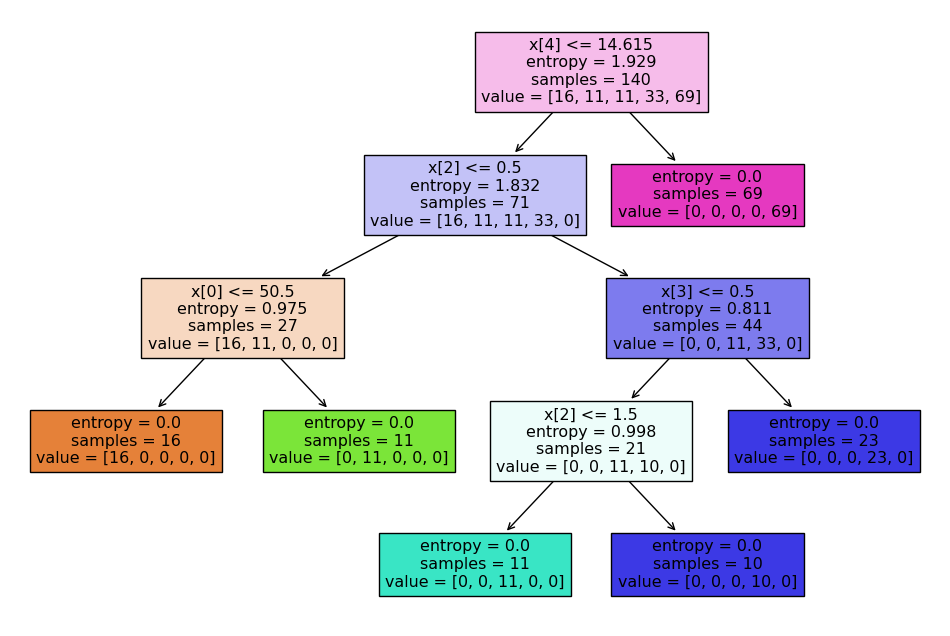

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True)
plt.show()

In [12]:
y_hat = model.predict(X_test)

In [13]:
print(y_hat[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [14]:
#model evaluation 
from sklearn import metrics
print("DecisionTrees's Accuracy: ", 
      metrics.accuracy_score(y_test, y_hat))

DecisionTrees's Accuracy:  0.9833333333333333


<Figure size 1000x800 with 0 Axes>

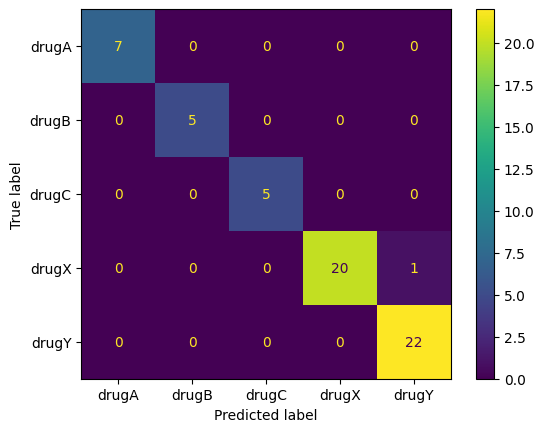

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=[10,8])
cm = confusion_matrix(y_test, y_hat, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

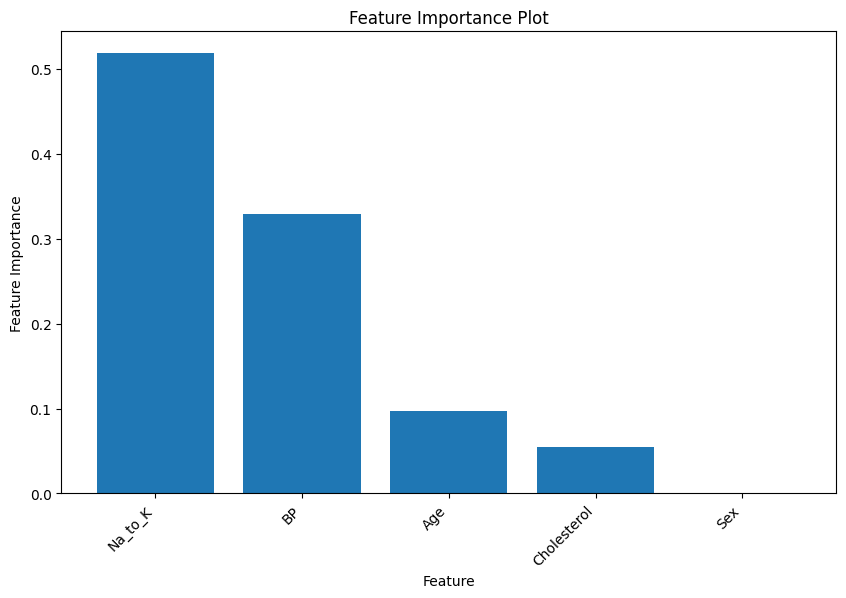

In [18]:
#feature importance plot 
feature_imp = model.feature_importances_
feature_names = ["Age", "Sex", "BP", "Cholesterol","Na_to_K"]
indices = np.argsort(feature_imp)[::-1] #sort the feature importances in decending order 

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_imp)), feature_imp[indices], align='center')
plt.xticks(range(len(feature_imp)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

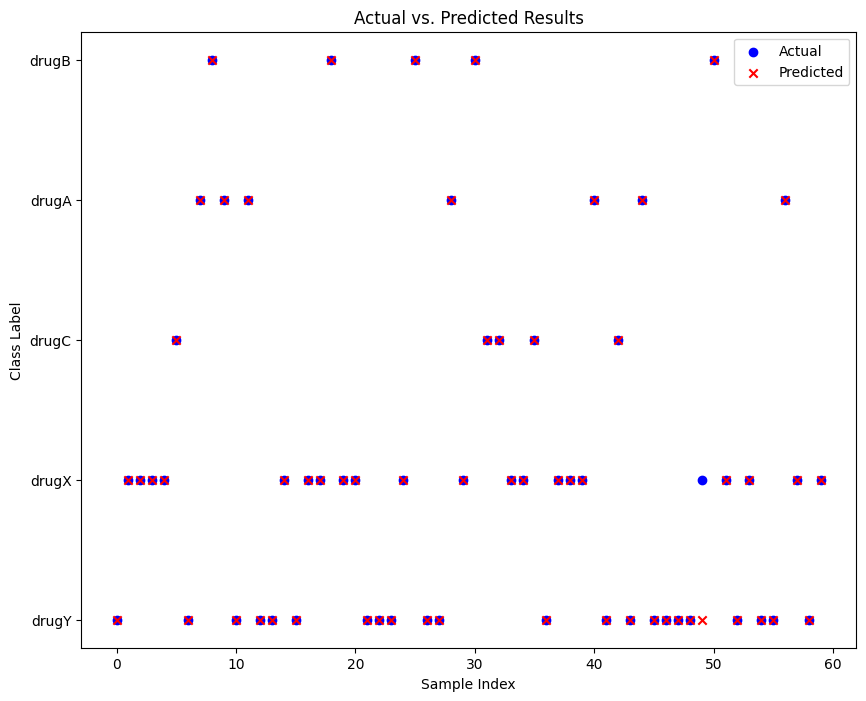

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(range(len((y_test))), y_test, color = 'blue', label = 'Actual', marker ='o')
plt.scatter(range(len((y_hat))), y_hat, color = 'red', label = 'Predicted', marker ='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title("Actual vs. Predicted Results")
plt.legend()
plt.show()

In decision Tree regression, we choose features that minimize the error instead of choosing that maximize the information gain as in decision tree classifier. 
